In [1]:
import torch
import numpy as np

from utils.utils import *
from utils.dataloader import *
from utils.nop import *

import matplotlib.pyplot as plt

/home/marlon/miniconda3/envs/torch39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Data and model location
data_path = 'data/era5_Santos_2022-2023.nc'
bath_path = 'data/era5_Santos_2022-2023_bath.nc'

device = torch.device('cuda')

In [3]:
D = data_loader(data_path,bath_path)

In [4]:
d = D.sample_graph(1000, 0, radius=500, n_connections=0, validation=False, seed=0)

Text(0.5, 1.0, 'bath')

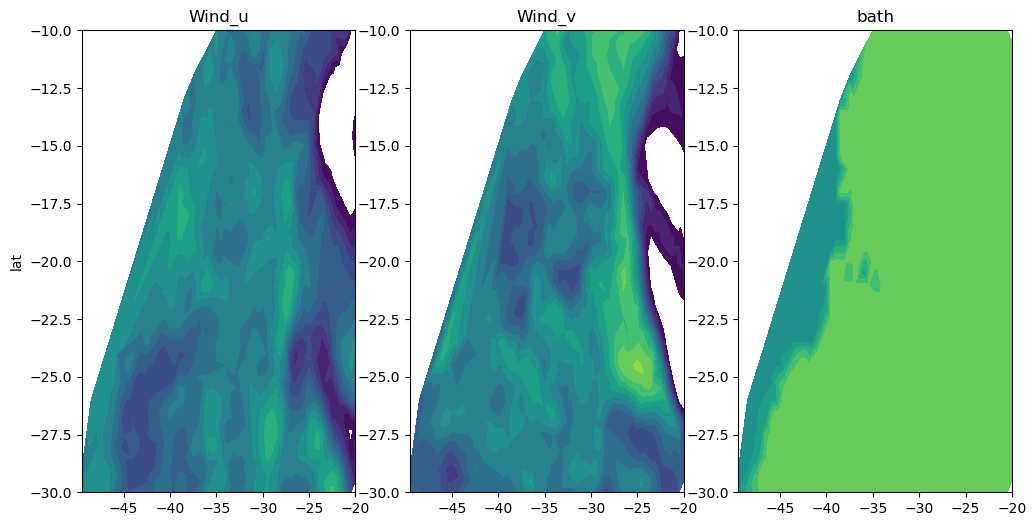

In [5]:
X = d.coords
F = d.x.cpu().detach().numpy()

n_contours = 16

plt.figure(figsize=(12,6))

contours = 2*np.linspace(-1,1,n_contours)

plt.subplot(1,3,1)
plt.tricontourf(X[:,0],X[:,1],F[:,0],contours)
plt.title('Wind_u')
plt.ylabel('lat')

plt.subplot(1,3,2)
plt.tricontourf(X[:,0],X[:,1],F[:,1],contours)
plt.title('Wind_v')

plt.subplot(1,3,3)
plt.tricontourf(X[:,0],X[:,1],F[:,2],contours)
plt.title('bath')

<function matplotlib.pyplot.show(close=None, block=None)>

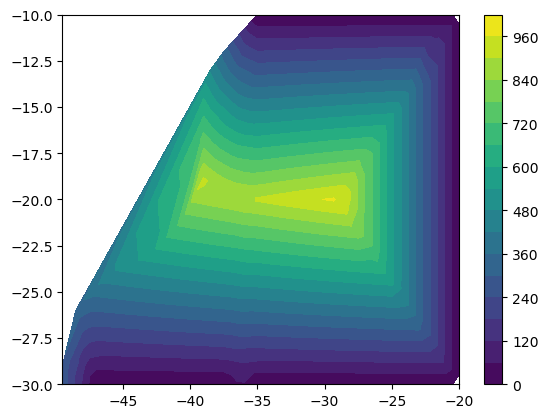

In [6]:
plt.tricontourf(X[:,0],X[:,1],d.D_sea,16)
plt.colorbar()
plt.show

In [7]:
from torch_geometric.loader import DataLoader

# Load data and generate meshes
data_train = []
for i in range(100):

    n = randintlog(100,1000)

    data_train.append(D.sample_graph(n, i, radius=500))

    print(f'Train sample: {i}, Nodes: {n}, Edges: {data_train[-1].edge_index.shape[1]}')

Train sample: 0, Nodes: 385, Edges: 148225
Train sample: 1, Nodes: 286, Edges: 81796
Train sample: 2, Nodes: 432, Edges: 186624
Train sample: 3, Nodes: 940, Edges: 883600
Train sample: 4, Nodes: 280, Edges: 78400
Train sample: 5, Nodes: 846, Edges: 715716
Train sample: 6, Nodes: 297, Edges: 88209
Train sample: 7, Nodes: 378, Edges: 142884
Train sample: 8, Nodes: 981, Edges: 962361
Train sample: 9, Nodes: 208, Edges: 43264
Train sample: 10, Nodes: 127, Edges: 16129
Train sample: 11, Nodes: 413, Edges: 170569
Train sample: 12, Nodes: 587, Edges: 344569
Train sample: 13, Nodes: 218, Edges: 47524
Train sample: 14, Nodes: 201, Edges: 40401
Train sample: 15, Nodes: 110, Edges: 12100
Train sample: 16, Nodes: 773, Edges: 597529
Train sample: 17, Nodes: 390, Edges: 152100
Train sample: 18, Nodes: 287, Edges: 82369
Train sample: 19, Nodes: 741, Edges: 549081
Train sample: 20, Nodes: 502, Edges: 252004
Train sample: 21, Nodes: 497, Edges: 247009
Train sample: 22, Nodes: 684, Edges: 467856
Train s

In [8]:
loader_train = DataLoader(data_train, batch_size=1, shuffle=False)

In [9]:
for batch in loader_train:
    batch

In [10]:
batch

DataBatch(x=[465, 5], edge_index=[2, 216225], edge_attr=[216225, 3], y=[465], D_sea=[465], coords=[1], batch=[465], ptr=[2])

In [11]:
D.lat

array([-29. , -29.5, -30. , ..., -29. , -29.5, -30. ], dtype=float32)